## Softmax Regression or Multinomial Logistic Regression

* for more then two class yes, no, optout
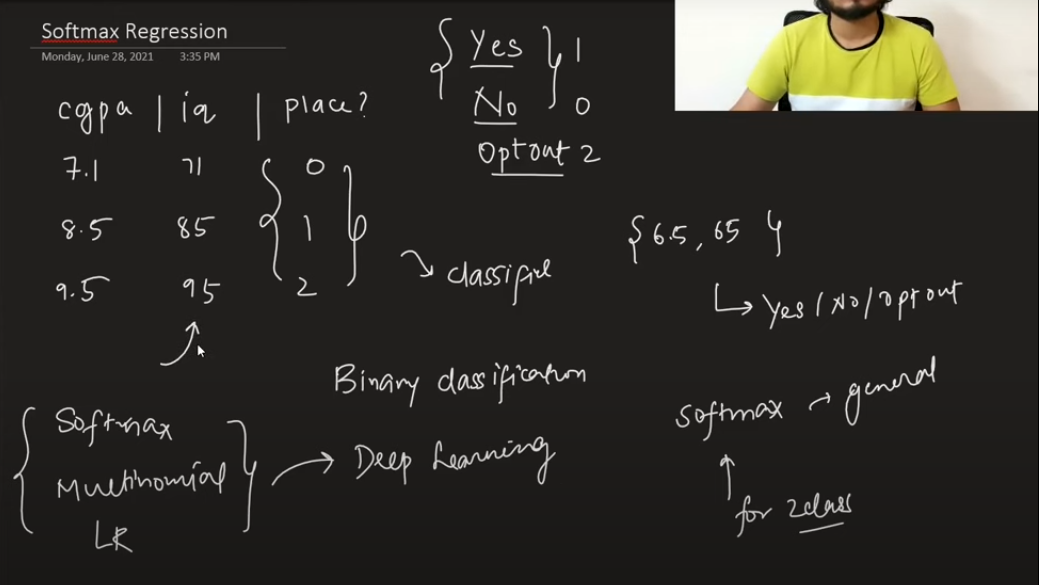

### not applied just to see 

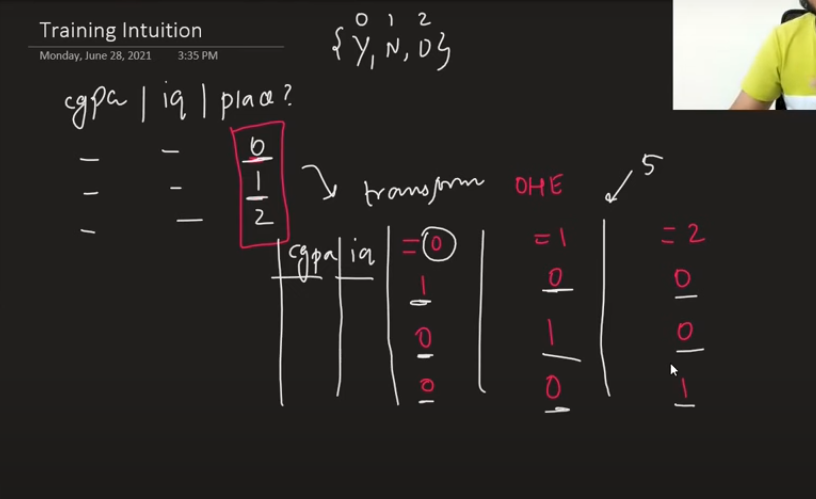
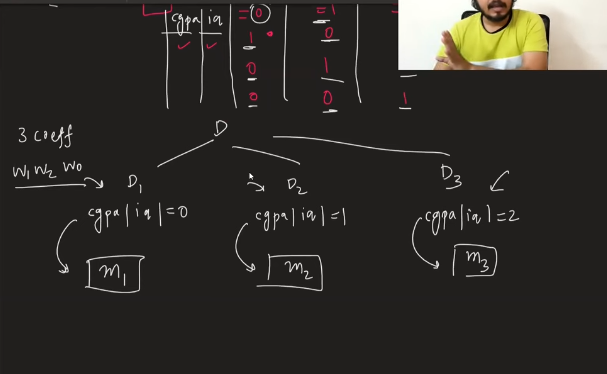
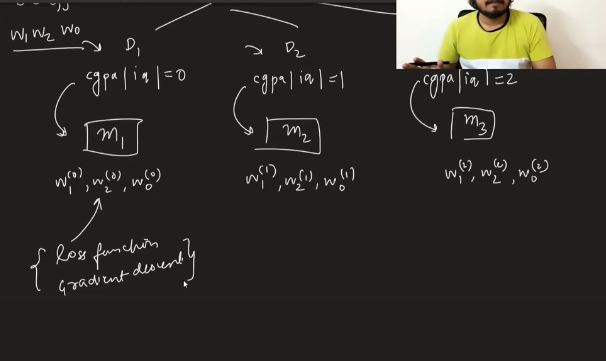
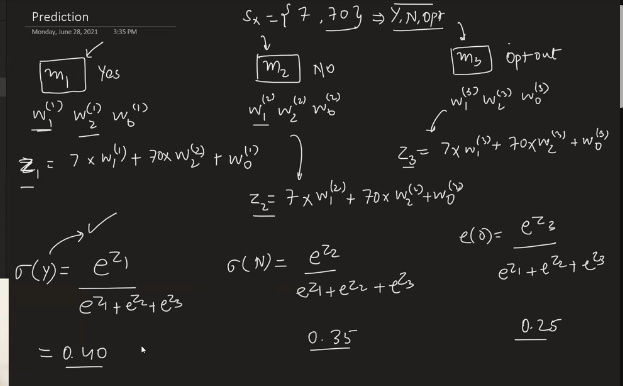

### the above approach is not applied in sklearn as it creates seprate model for each class which will get very slow to train

## The real approach used in sklearn :-

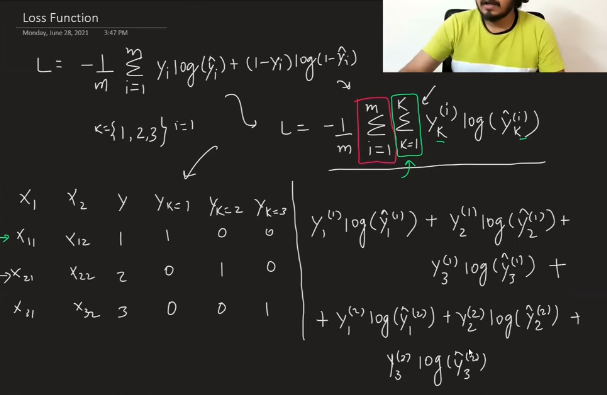
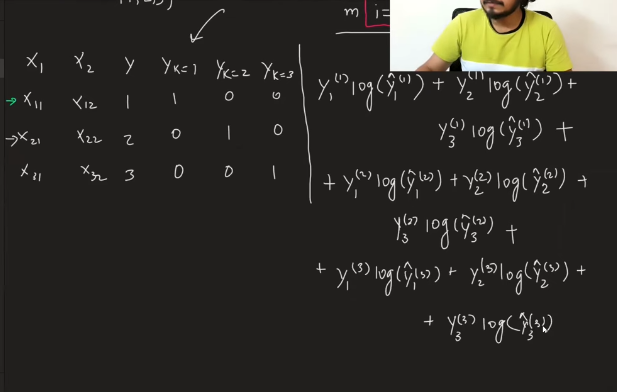
* only this will be left as rest will become 0 beacuse of the differnt yk value
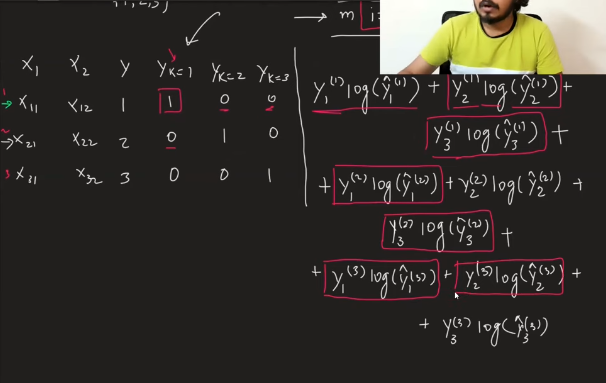
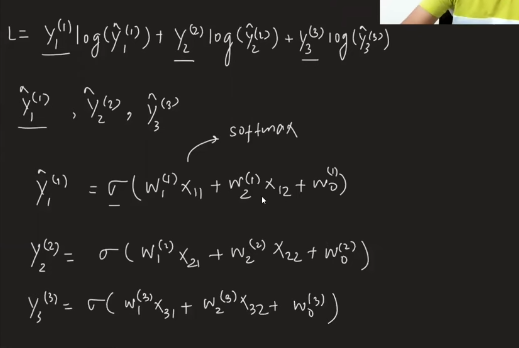
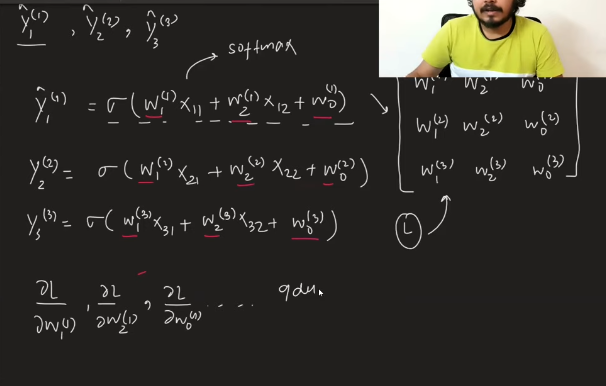
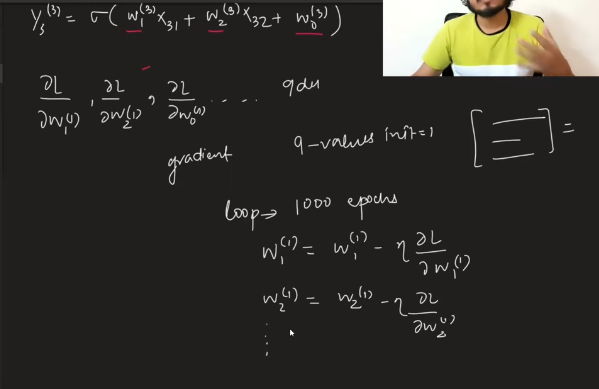


# Coding

In [1]:

import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
df = sns.load_dataset('iris')

In [8]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [9]:
df['species']

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [10]:
encoder = LabelEncoder()
df['species'] = encoder.fit_transform(df['species'])

In [11]:
df['species']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int32

In [12]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [13]:
df = df[['sepal_length','petal_length','species']]

In [14]:
df.head()

,sepal_length,petal_length,species
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0


In [15]:
X = df.iloc[:,0:2]
print(X)

     sepal_length  petal_length
0             5.1           1.4
1             4.9           1.4
2             4.7           1.3
3             4.6           1.5
4             5.0           1.4
..            ...           ...
145           6.7           5.2
146           6.3           5.0
147           6.5           5.2
148           6.2           5.4
149           5.9           5.1

[150 rows x 2 columns]


In [16]:
y = df.iloc[:,-1]
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int32


In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [18]:
clf = LogisticRegression(multi_class='multinomial')

In [19]:
clf.fit(X_train,y_train)

C:\Users\hp.1\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='multinomial')

In [20]:
y_pred = clf.predict(X_test)

In [21]:
print(accuracy_score(y_test,y_pred))

0.9666666666666667


In [22]:
pd.DataFrame(confusion_matrix(y_test,y_pred))

,0,1,2
0,14,0,0
1,0,7,1
2,0,0,8


In [ ]:
# prediction
query = np.array([[3.4, 2.7]]) # taking a sample query  sepal_length,  petal_length
clf.predict_proba(query) # predicting the probability of being   setosa, versicolor, virginica

C:\Users\hp.1\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[7.25865651e-01, 2.73720718e-01, 4.13631316e-04]])

In [ ]:
clf.predict(query) # gives the maximum probability the query is( like this have a higher probability of being a satosa)

C:\Users\hp.1\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

C:\Users\hp.1\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


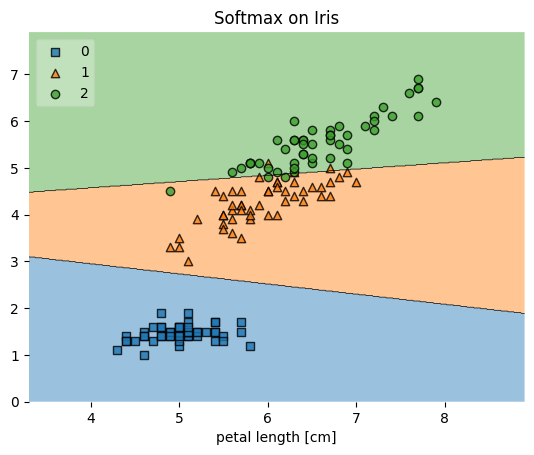

In [27]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X.values, y.values, clf, legend=2)

#Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.xlabel('petal length [cm]') 
plt.title('Softmax on Iris') 

plt.show()